## Import Libraries

In [1]:
import ydata_profiling as ydp
import pandas as pd
import numpy as np
import webbrowser as wb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [2]:
df = pd.read_csv("imdb_movies_shows.csv")

## Exploratory Data Analysis (EDA)

In [3]:
print(df.head())
print()
print(df.info())

                                 title   type  release_year age_certification  \
0  Five Came Back: The Reference Films   SHOW          1945             TV-MA   
1                          Taxi Driver  MOVIE          1976                 R   
2      Monty Python and the Holy Grail  MOVIE          1975                PG   
3                        Life of Brian  MOVIE          1979                 R   
4                         The Exorcist  MOVIE          1973                 R   

   runtime                 genres production_countries  seasons    imdb_id  \
0       48      ['documentation']               ['US']      1.0        NaN   
1      113     ['crime', 'drama']               ['US']      NaN  tt0075314   
2       91  ['comedy', 'fantasy']               ['GB']      NaN  tt0071853   
3       94             ['comedy']               ['GB']      NaN  tt0079470   
4      133             ['horror']               ['US']      NaN  tt0070047   

   imdb_score  imdb_votes  
0         NaN   

In [4]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values 
    summ['%missing'] = df.isnull().sum().values / len(df) * 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['average'] = desc['mean'].values
    summ['standard_deviation'] = desc['std'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values
    
    return summ

In [5]:
summary(df).style.background_gradient(cmap='YlOrBr')

data shape: (5806, 11)


,data type,#missing,%missing,#unique,min,max,average,standard_deviation,first value,second value,third value
title,object,1,0.017224,5751,nan,nan,nan,nan,Five Came Back: The Reference Films,Taxi Driver,Monty Python and the Holy Grail
type,object,0,0.000000,2,nan,nan,nan,nan,SHOW,MOVIE,MOVIE
release_year,int64,0,0.000000,67,1945.000000,2022.000000,2016.013434,7.324883,1945,1976,1975
age_certification,object,2610,44.953496,11,nan,nan,nan,nan,TV-MA,R,PG
runtime,int64,0,0.000000,205,0.000000,251.000000,77.643989,39.474160,48,113,91
genres,object,0,0.000000,1626,nan,nan,nan,nan,['documentation'],"['crime', 'drama']","['comedy', 'fantasy']"
production_countries,object,0,0.000000,449,nan,nan,nan,nan,['US'],['US'],['GB']
seasons,float64,3759,64.743369,23,1.000000,42.000000,2.165608,2.636207,1.000000,nan,nan
imdb_id,object,444,7.647261,5362,nan,nan,nan,nan,nan,tt0075314,tt0071853
imdb_score,float64,523,9.007923,81,1.500000,9.600000,6.533447,1.160932,nan,8.300000,8.200000


## EDA with ydataprofiling

In [6]:
ITD214_report = ydp.ProfileReport(df)
ITD214_report.to_file('ITD214_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\sheng\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'Function <code object pandas_auto_compute at 0x000001BE29AC02B0, file "C:\Users\sheng\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\pandas\correlations_pandas.py", line 167>')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
wb.open_new_tab('ITD214_report.html')

True

# Additional Visualisations

<Axes: ylabel='Frequency'>

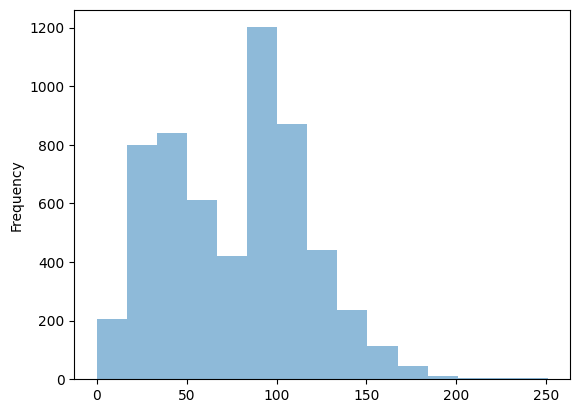

In [8]:
%matplotlib inline
# Distribution of movie/show runtime|
df['runtime'].plot.hist(bins=15, alpha=0.5)

<Axes: ylabel='Frequency'>

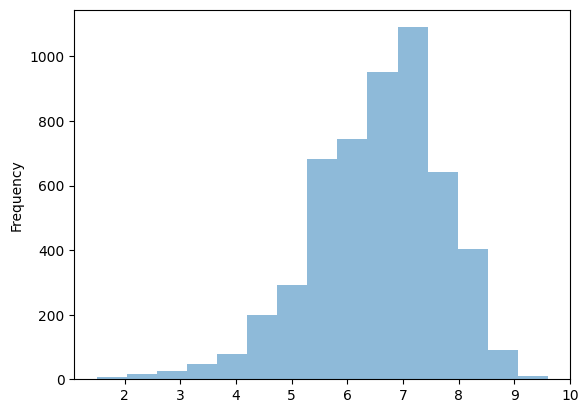

In [9]:
# Distribution of imdb_score
df['imdb_score'].plot.hist(bins=15, alpha=0.5)

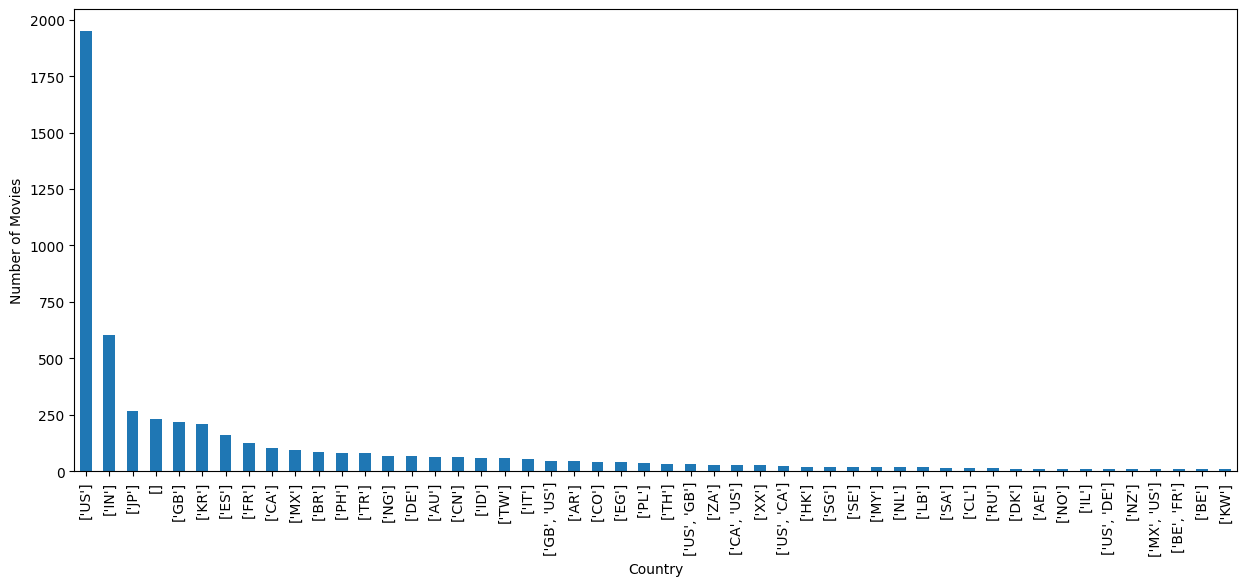

In [10]:
%matplotlib inline
# Distribution of movies/shows by production countries (top 50)
plt.figure(figsize=(15, 6))  
df['production_countries'].value_counts().head(50).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.show()

<Axes: ylabel='Frequency'>

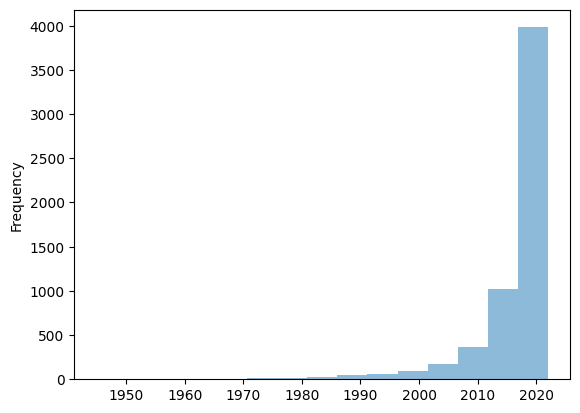

In [11]:
# Distribution for release year
df['release_year'].plot.hist(bins=15, alpha=0.5)

## Data Cleaning (Part 1)

In [12]:
# Generare Title + Year to verify uniqueness
df['title_year'] = df['title'] + df['release_year'].astype(str)

# Remove duplicated rows
df.drop_duplicates(subset=['title_year'], inplace=True)
df.shape

(5802, 12)

In [13]:
# Remove rows where imdb_votes is NaN
df = df.dropna(subset='imdb_votes')

In [14]:
# Remove rows where runtime = 0 (logical exclusion)
df = df[~df[['runtime']].isin([0]).any(axis=1)]

In [15]:
# Reset index for summary function to work
df = df.reset_index()

## Feature Engineering

In [16]:
# Multiple runtime with seasons to capture total time

df['seasons'] = df['seasons'].fillna(1)
df['runtime_combined'] = df['runtime'].astype(float) * df['seasons'].astype(float)

In [17]:
# Preparation for one-hot encoding of 'genres' with validation

# Validation - Datatype before conversion
print("Before conversion:")
print(df['genres'].head())
print("Data type:", df['genres'].dtype)

# Convert string representations of lists into actual lists
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x))

# Validation - Datatype after conversion
print("\nAfter conversion:")
print(df['genres'].head())
print("Data type of first element:", type(df['genres'][0]))

# Validation - Manual Observation Method
for index, genres in enumerate(df['genres']):
    print(f"Row {index}: {genres} (Type: {type(genres)})")

Before conversion:
0        ['crime', 'drama']
1     ['comedy', 'fantasy']
2                ['comedy']
3                ['horror']
4    ['comedy', 'european']
Name: genres, dtype: object
Data type: object

After conversion:
0        [crime, drama]
1     [comedy, fantasy]
2              [comedy]
3              [horror]
4    [comedy, european]
Name: genres, dtype: object
Data type of first element: <class 'list'>
Row 0: ['crime', 'drama'] (Type: <class 'list'>)
Row 1: ['comedy', 'fantasy'] (Type: <class 'list'>)
Row 2: ['comedy'] (Type: <class 'list'>)
Row 3: ['horror'] (Type: <class 'list'>)
Row 4: ['comedy', 'european'] (Type: <class 'list'>)
Row 5: ['thriller', 'crime', 'action'] (Type: <class 'list'>)
Row 6: ['drama', 'music', 'romance', 'family'] (Type: <class 'list'>)
Row 7: ['romance', 'drama'] (Type: <class 'list'>)
Row 8: ['drama', 'crime', 'action'] (Type: <class 'list'>)
Row 9: ['western', 'action', 'european'] (Type: <class 'list'>)
Row 10: ['war', 'action', 'drama'] (Type: <

In [18]:
# One-hot encoding of 'genres' column
mlb = MultiLabelBinarizer()
transformed = mlb.fit_transform(df['genres'])
genre_labels = mlb.classes_

# Create a temporary DataFrame for the new 'genres' columns
genres_df = pd.DataFrame(transformed, columns=genre_labels)

# Concatenate with original DataFrame
df_2= pd.concat([df, genres_df], axis=1).drop('genres', axis=1)

# Display the new DataFrame with one-hot encoded 'genres'
print(df_2)

      index                            title   type  release_year  \
0         1                      Taxi Driver  MOVIE          1976   
1         2  Monty Python and the Holy Grail  MOVIE          1975   
2         3                    Life of Brian  MOVIE          1979   
3         4                     The Exorcist  MOVIE          1973   
4         5     Monty Python's Flying Circus   SHOW          1969   
...     ...                              ...    ...           ...   
5242   5798                    Time to Dance  MOVIE          2021   
5243   5800      Momshies! Your Soul is Mine  MOVIE          2021   
5244   5801                        Fine Wine  MOVIE          2021   
5245   5803                            Clash  MOVIE          2021   
5246   5804                   Shadow Parties  MOVIE          2021   

     age_certification  runtime production_countries  seasons     imdb_id  \
0                    R      113               ['US']      1.0   tt0075314   
1                

In [19]:
# Preparation to extract only first country
df_2['production_countries'] = df_2['production_countries'].apply(lambda x: ast.literal_eval(x))

In [20]:
# Remove rows with empty 'production_countries'
df_2= df_2[df_2['production_countries'].map(bool)]

# Extract the first country
df_2['first_country'] = df_2['production_countries'].apply(lambda x: x[0] if x else None)

In [21]:
# Preparation for conversion of country code to continent

df_ref = pd.read_excel('Country List.xlsx')

continent_mapping = pd.Series(df_ref['Continent'].values, index=df_ref['ISO Code']).to_dict()

# Map the 'first_country' to its corresponding continent

df_2['Continent'] = df_2['first_country'].map(continent_mapping)

In [22]:
df_2= pd.get_dummies(df_2, columns=['Continent'], prefix='Continent')

In [23]:
# Generalisation of ratings

rating_map = {
    'G': 'General audience',
    'NC-17': 'Mature',
    'PG': 'General audience',
    'PG-13': 'Teen',
    'R': 'Mature',
    'TV-14': 'Teen',
    'TV-G': 'General audience',
    'TV-MA': 'Mature',
    'TV-PG': 'General audience',
    'TV-Y': 'Children',
    'TV-Y7': 'Children',
    np.nan : 'Missing'
}

# Apply the mapping to create a new column
df_2['Age Group'] = df_2['age_certification'].map(rating_map)

In [24]:
df_2= pd.get_dummies(df_2, columns=['Age Group'], prefix='Age_Group')

In [25]:
# Split years into 3 bins

df_2['Summarised_year'] = pd.qcut(df_2['release_year'], q=3, labels=['Old', 'Modern', 'New'])

In [26]:
df_2 = pd.get_dummies(df_2, columns=['Summarised_year'], prefix='Summarised_year')

In [27]:
print(df_2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5082 entries, 0 to 5245
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       5082 non-null   int64  
 1   title                       5082 non-null   object 
 2   type                        5082 non-null   object 
 3   release_year                5082 non-null   int64  
 4   age_certification           2920 non-null   object 
 5   runtime                     5082 non-null   int64  
 6   production_countries        5082 non-null   object 
 7   seasons                     5082 non-null   float64
 8   imdb_id                     5082 non-null   object 
 9   imdb_score                  5082 non-null   float64
 10  imdb_votes                  5082 non-null   float64
 11  title_year                  5082 non-null   object 
 12  runtime_combined            5082 non-null   float64
 13  action                      5082 non-n

In [28]:
#grouping imdb score with >=7 as worth watching, <7 as a waste of time
df_2['worth_watching?'] = df_2['imdb_score'].apply(lambda x: 'Worth_Watching' if x >= 7 else 'Waste of Time')
df_2['worth_watching?'].value_counts()

worth_watching?
Waste of Time     3082
Worth_Watching    2000
Name: count, dtype: int64

In [29]:
df_3 = df_2.drop(columns = ['index','title_year','title','release_year','age_certification','runtime','production_countries','seasons','imdb_id','imdb_votes','imdb_score','first_country'])

In [30]:
summary(df_3).style.background_gradient(cmap='YlOrBr')

data shape: (5082, 37)


,data type,#missing,%missing,#unique,min,max,average,standard_deviation,first value,second value,third value
type,object,0,0.000000,2,nan,nan,nan,nan,MOVIE,MOVIE,MOVIE
runtime_combined,float64,0,0.000000,268,2.000000,2016.000000,95.335891,66.555648,113.000000,91.000000,94.000000
action,int32,0,0.000000,2,0.000000,1.000000,0.197560,0.398198,0,0,0
animation,int32,0,0.000000,2,0.000000,1.000000,0.112948,0.316560,0,0,0
comedy,int32,0,0.000000,2,0.000000,1.000000,0.409288,0.491751,0,1,1
crime,int32,0,0.000000,2,0.000000,1.000000,0.168438,0.374291,1,0,0
documentation,int32,0,0.000000,2,0.000000,1.000000,0.151909,0.358968,0,0,0
drama,int32,0,0.000000,2,0.000000,1.000000,0.536993,0.498679,1,0,0
european,int32,0,0.000000,2,0.000000,1.000000,0.087170,0.282112,0,0,0
family,int32,0,0.000000,2,0.000000,1.000000,0.113932,0.317759,0,0,0


In [31]:
#movies = 1, show = 0
df_3['is_movie'] = df_3['type'].apply(lambda x: 1 if x == 'MOVIE' else 0)
df_3 = df_3.drop('type', axis=1)

#worth_watching = 1, waste of time = 0
df_3['worth_watching_binary'] = df_3['worth_watching?'].apply(lambda x: 1 if x == 'Worth_Watching' else 0)
df_3 = df_3.drop('worth_watching?', axis=1)

In [32]:
#convert boolean to integer, true = 1, false = 0
bool_cols = ['Age_Group_Children', 'Age_Group_General audience', 'Age_Group_Mature', 
             'Age_Group_Missing', 'Age_Group_Teen', 'Summarised_year_Old', 
             'Summarised_year_Modern', 'Summarised_year_New']
for col in bool_cols:
    df_3[col] = df_3[col].astype(int)

In [33]:
df_3.head()

,runtime_combined,action,animation,comedy,crime,documentation,drama,european,family,fantasy,...,Age_Group_Children,Age_Group_General audience,Age_Group_Mature,Age_Group_Missing,Age_Group_Teen,Summarised_year_Old,Summarised_year_Modern,Summarised_year_New,is_movie,worth_watching_binary
0,113.0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,1
1,91.0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,1
2,94.0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
3,133.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
4,120.0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1


C:\Users\sheng\AppData\Local\Temp\ipykernel_24664\4047772209.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


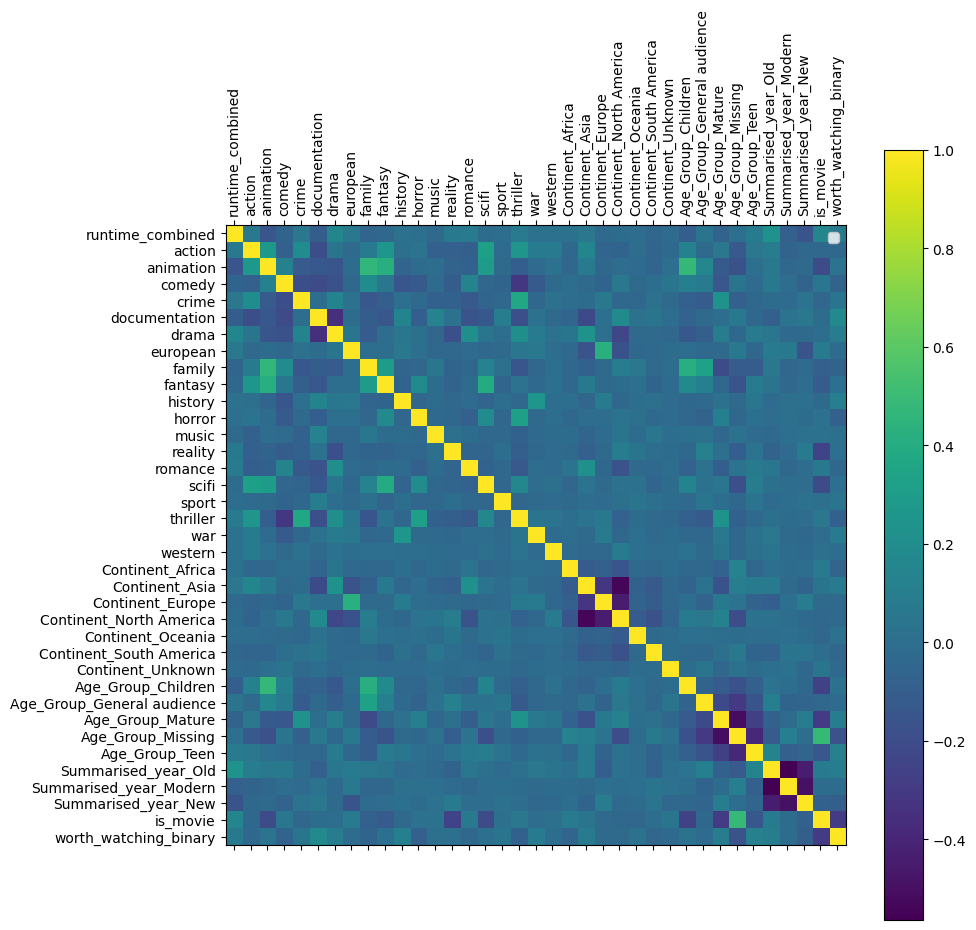

In [34]:
### Ploting the co-relation matrix of the IMDB movie/shows dataframe.

def plot_corr(df_3,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df_3.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(df_3)

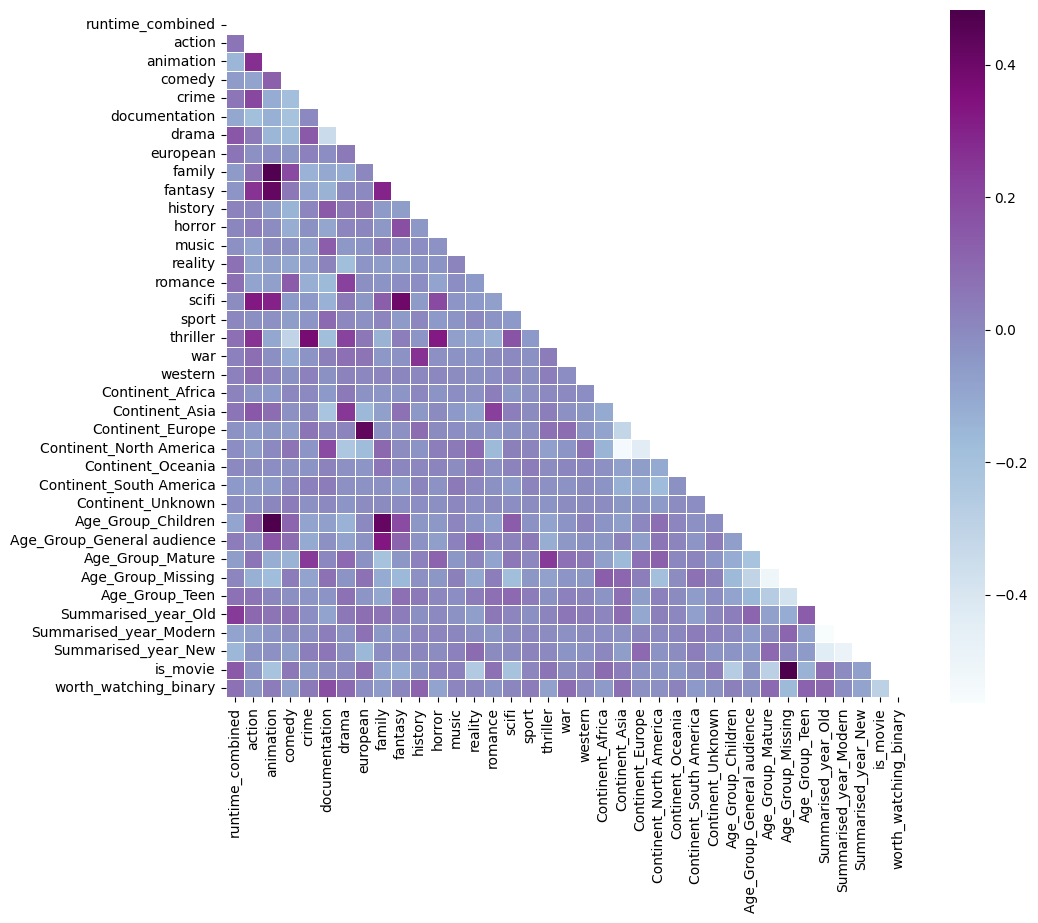

In [35]:
# Compute the correlation matrix 
corr_all = df_3.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

## ScikitLearn

In [36]:
# Put into a variable "x" all the values in all but the column "worth_watching?". 
# Put into a variable "y" all the values in the column "worth_watching?". 
x = df_3.drop('worth_watching_binary', axis=1)
y = df_3[['worth_watching_binary']]



print(x.head())
print("\n\n")
print(y.head())
print()
print(x.shape)
print(y.shape)

   runtime_combined  action  animation  comedy  crime  documentation  drama  \
0             113.0       0          0       0      1              0      1   
1              91.0       0          0       1      0              0      0   
2              94.0       0          0       1      0              0      0   
3             133.0       0          0       0      0              0      0   
4             120.0       0          0       1      0              0      0   

   european  family  fantasy  ...  Continent_Unknown  Age_Group_Children  \
0         0       0        0  ...              False                   0   
1         0       0        1  ...              False                   0   
2         0       0        0  ...              False                   0   
3         0       0        0  ...              False                   0   
4         1       0        0  ...              False                   0   

   Age_Group_General audience  Age_Group_Mature  Age_Group_Missing  

In [37]:
y.head()

,worth_watching_binary
0,1
1,1
2,1
3,1
4,1


In [38]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


In [39]:
models = []
models.append(('Support Vector Machine', SVC(gamma='auto')))
models.append(('Logistic Regression', LogisticRegression(solver='liblinear')))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier(n_estimators=10)))
models.append(('Neural Network', MLPClassifier()))


In [40]:
# Import train_test_split and accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score 

In [41]:
# Split the training and testing data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify = df_3.worth_watching_binary, random_state=123)

In [42]:
x_test.shape

(1271, 36)

In [43]:
svm_model = SVC()
logistic_model = LogisticRegression()
tree_model = DecisionTreeClassifier()
forest_model = RandomForestClassifier()
nn_model = MLPClassifier()

#Fit models to training data
svm_model.fit(x_train, y_train)
logistic_model.fit(x_train, y_train)
tree_model.fit(x_train, y_train)
forest_model.fit(x_train, y_train)
nn_model.fit(x_train, y_train)

C:\Users\sheng\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sheng\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sheng\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative

MLPClassifier()

In [44]:
# Fit the models and score them
names = []
scores = []
precisions = []
recall = []
y_train = y_train.worth_watching_binary
y_test = y_test.worth_watching_binary
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test,y_pred, pos_label=1))
    recall.append(recall_score(y_test,y_pred, pos_label=1))
    names.append(name)

In [45]:
# Print out "scores" and "names".
print(scores)
print(names)
print(precisions)
print(recall)

[0.6915814319433516, 0.6907946498819827, 0.6616837136113297, 0.7041699449252558, 0.6852871754523997]
['Support Vector Machine', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Neural Network']
[0.6475409836065574, 0.6334164588528678, 0.5729166666666666, 0.6519607843137255, 0.5856164383561644]
[0.474, 0.508, 0.55, 0.532, 0.684]


In [46]:
# Compare the accuracy of the models, sorting your answer in descending order of score.

models_comparison = pd.DataFrame({'Name': names, 'Accuracy': scores, 'Precision': precisions,'Recall': recall,})
models_comparison.sort_values(by='Accuracy', ascending = False, inplace = True)
print(models_comparison)

                     Name  Accuracy  Precision  Recall
3           Random Forest  0.704170   0.651961   0.532
0  Support Vector Machine  0.691581   0.647541   0.474
1     Logistic Regression  0.690795   0.633416   0.508
4          Neural Network  0.685287   0.585616   0.684
2           Decision Tree  0.661684   0.572917   0.550


In [59]:
models_comparison.to_excel('models_comparison.xlsx', index=False)


In [47]:
models

[('Support Vector Machine', SVC(gamma='auto')),
 ('Logistic Regression', LogisticRegression(solver='liblinear')),
 ('Decision Tree', DecisionTreeClassifier()),
 ('Random Forest', RandomForestClassifier(n_estimators=10)),
 ('Neural Network', MLPClassifier())]

In [48]:
# Print out feature importances of random forest
for name, model in models:
    if name == 'Random Forest':
        print(f"Feature importances for {name}:")
        print(model.feature_importances_)
        break 

Feature importances for Random Forest:
[0.34813772 0.02462772 0.01437357 0.0326904  0.02570573 0.03694361
 0.03623532 0.01392624 0.01671384 0.01688851 0.01473582 0.01286632
 0.01304651 0.0077558  0.02341982 0.01767467 0.01108183 0.02212312
 0.00943334 0.00188622 0.00502196 0.02143314 0.01800946 0.02202452
 0.0034248  0.00780265 0.00136567 0.00508306 0.01332639 0.01594625
 0.02788632 0.01895623 0.02382055 0.01661279 0.01909431 0.07992578]


In [49]:
### Save all the features in a variable called features
features = df_3.drop('worth_watching_binary', axis=1).columns

In [50]:
features_weight = list(zip(features, forest_model.feature_importances_))
features_weight_df = pd.DataFrame(features_weight, columns=['Feature', 'Weight'])
print(features_weight_df)

                       Feature    Weight
0             runtime_combined  0.348118
1                       action  0.025191
2                    animation  0.015630
3                       comedy  0.033053
4                        crime  0.025102
5                documentation  0.044788
6                        drama  0.035556
7                     european  0.013006
8                       family  0.016873
9                      fantasy  0.016106
10                     history  0.014619
11                      horror  0.013343
12                       music  0.013077
13                     reality  0.007445
14                     romance  0.025086
15                       scifi  0.016002
16                       sport  0.010391
17                    thriller  0.023162
18                         war  0.010182
19                     western  0.002022
20            Continent_Africa  0.004610
21              Continent_Asia  0.022790
22            Continent_Europe  0.016352
23     Continent

C:\Users\sheng\AppData\Local\Temp\ipykernel_24664\3073306544.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weight', y='Feature', data=features_weight_df, palette='Blues_d')


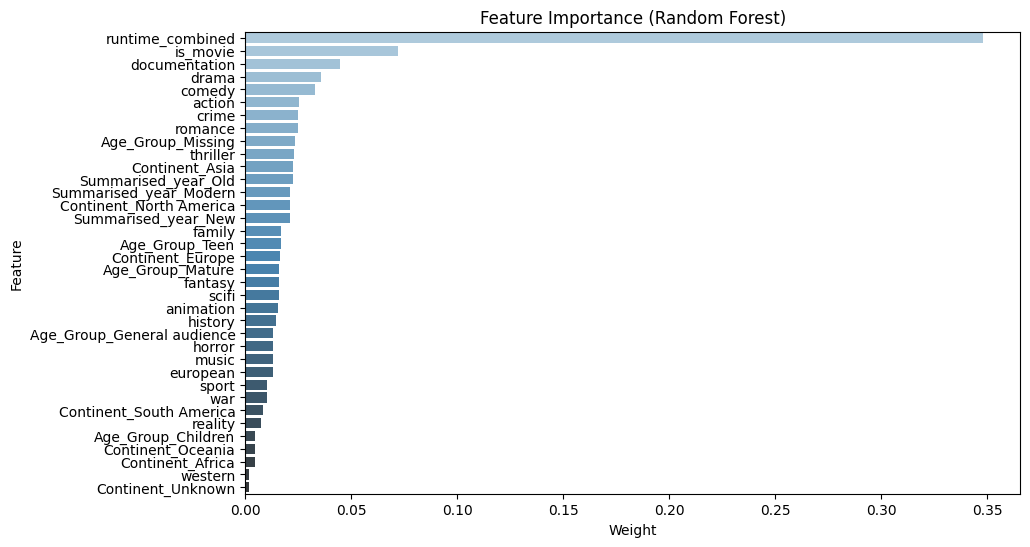

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
features_weight_df = features_weight_df.sort_values(by='Weight', ascending=False)
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
sns.barplot(x='Weight', y='Feature', data=features_weight_df, palette='Blues_d')
plt.xlabel('Weight')
plt.title('Feature Importance (Random Forest)')
plt.show()

In [51]:
# Select features of weight more than 0.02
selectedFeatures = []

for item in features_weight:
  if item[1] > 0.02:
    selectedFeatures.append(item)
    
selected_features_df = pd.DataFrame(selectedFeatures, columns=['Feature', 'Weight'])
print(selected_features_df)

                    Feature    Weight
0          runtime_combined  0.348118
1                    action  0.025191
2                    comedy  0.033053
3                     crime  0.025102
4             documentation  0.044788
5                     drama  0.035556
6                   romance  0.025086
7                  thriller  0.023162
8            Continent_Asia  0.022790
9   Continent_North America  0.021002
10        Age_Group_Missing  0.023630
11      Summarised_year_Old  0.022715
12   Summarised_year_Modern  0.021226
13      Summarised_year_New  0.020916
14                 is_movie  0.072207


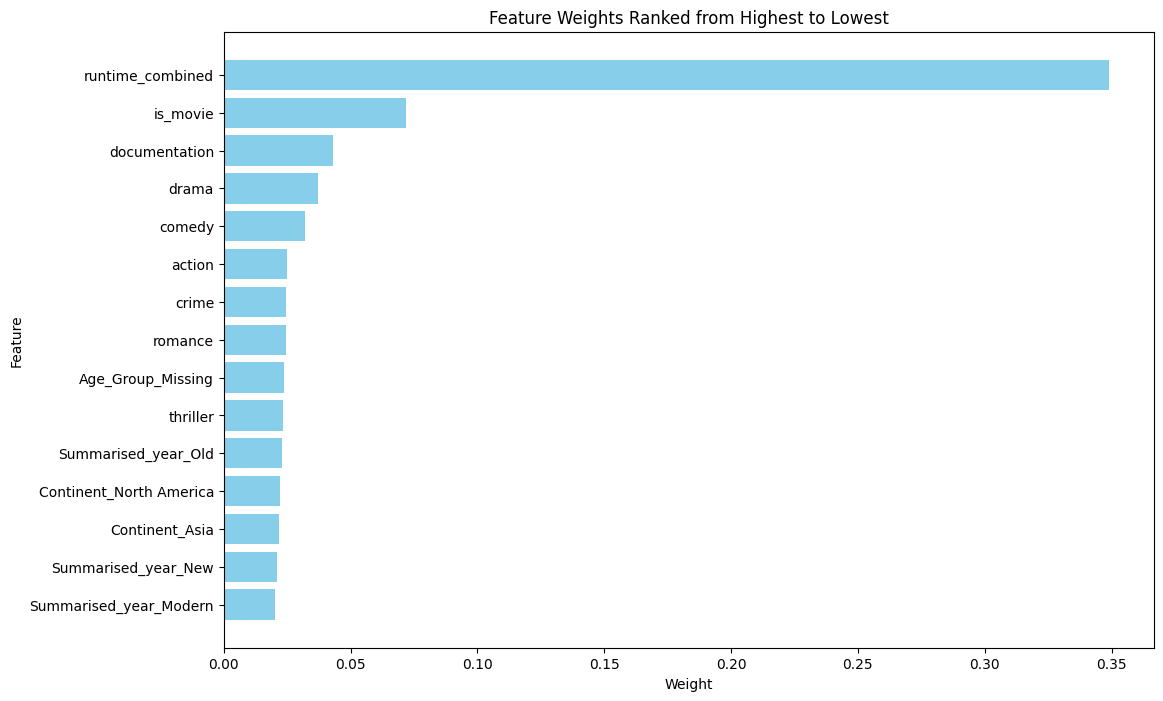

In [52]:
# Creating the DataFrame
data = {
    "Feature": [
        "runtime_combined", "action", "comedy", "crime", "documentation",
        "drama", "romance", "thriller", "Continent_Asia", "Continent_North America",
        "Age_Group_Missing", "Summarised_year_Old", "Summarised_year_Modern",
        "Summarised_year_New", "is_movie"
    ],
    "Weight": [
        0.349177, 0.025099, 0.031855, 0.024460, 0.043116,
        0.037138, 0.024373, 0.023453, 0.021929, 0.022338,
        0.023649, 0.022786, 0.020279, 0.020895, 0.071776
    ]
}

df = pd.DataFrame(data)

# Sorting the DataFrame by 'Weight' in descending order
df_sorted = df.sort_values(by='Weight', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(df_sorted['Feature'], df_sorted['Weight'], color='skyblue')
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.title('Feature Weights Ranked from Highest to Lowest')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest weights on top
plt.show()

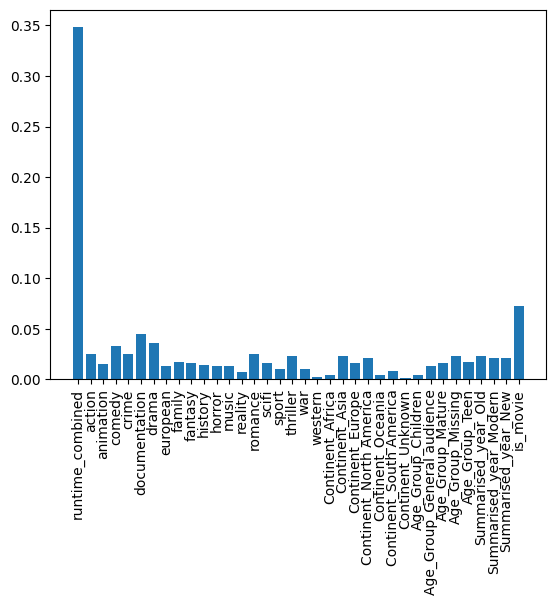

In [53]:
# Plot a bar chart showing the weights vs features as contained in features_weight.
import matplotlib.pyplot as plt

# plot
plt.bar(*zip(*features_weight))
plt.xticks(rotation=90)
plt.show()

In [54]:
print(*features_weight, sep=" ")
labels, values = list(zip(*selectedFeatures))


('runtime_combined', 0.3481180162867763) ('action', 0.02519135392581329) ('animation', 0.015630143232512758) ('comedy', 0.033052533706548544) ('crime', 0.02510219316467009) ('documentation', 0.044787736022788724) ('drama', 0.03555582973020569) ('european', 0.013006153539845014) ('family', 0.01687265871378578) ('fantasy', 0.016105925078770757) ('history', 0.01461919403155148) ('horror', 0.013343123888499621) ('music', 0.013076833636425342) ('reality', 0.007444753300327675) ('romance', 0.02508599645861425) ('scifi', 0.016002444241018664) ('sport', 0.010390823015830336) ('thriller', 0.023161657066240748) ('war', 0.01018171458850607) ('western', 0.0020218810828539096) ('Continent_Africa', 0.004610099869557908) ('Continent_Asia', 0.022790036031977948) ('Continent_Europe', 0.016351715323326948) ('Continent_North America', 0.021001741417033676) ('Continent_Oceania', 0.004671336978095652) ('Continent_South America', 0.008535498391212705) ('Continent_Unknown', 0.0016236194501113698) ('Age_Group

In [55]:
print(labels)
print(values)

('runtime_combined', 'action', 'comedy', 'crime', 'documentation', 'drama', 'romance', 'thriller', 'Continent_Asia', 'Continent_North America', 'Age_Group_Missing', 'Summarised_year_Old', 'Summarised_year_Modern', 'Summarised_year_New', 'is_movie')
(0.3481180162867763, 0.02519135392581329, 0.033052533706548544, 0.02510219316467009, 0.044787736022788724, 0.03555582973020569, 0.02508599645861425, 0.023161657066240748, 0.022790036031977948, 0.021001741417033676, 0.023630325817203143, 0.022714523647469093, 0.021226338342715083, 0.02091613606102526, 0.07220697742574897)


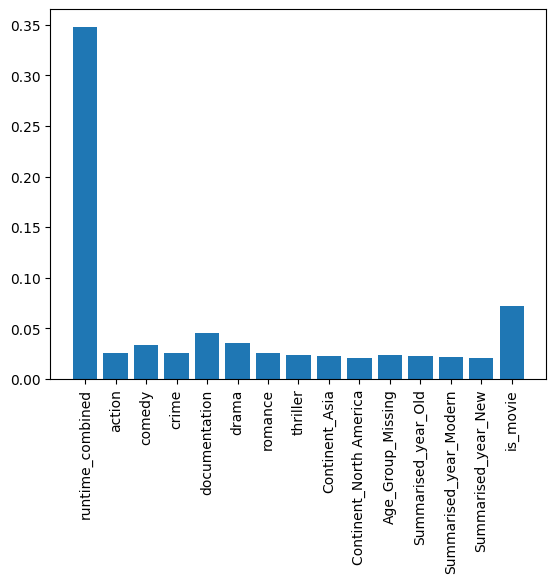

In [56]:
# Plot a bar chart showing the weights vs selected features as contained in selectedFeatures.
import matplotlib.pyplot as plt

# plot
plt.bar(labels,values)
plt.xticks(rotation=90)
plt.show()